In [1]:
from bias import Bias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import cProfile
from noise import Noise
from cosmology import Cosmology

In [2]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
bias = Bias(N0_file, M_path="cache/_M")
# bias = Bias(N0_file)

In [11]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_theory = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_theory, N_C1_theory = bias.bias_vec("theory", Ls_theory,dL_prim=10,Ntheta=100,Ntheta_prim=50)
print(N_A1_theory)
print(N_C1_theory)
print(N_A1_theory+N_C1_theory)
t1 = time.time()
print(f"Time = {t1 - t0}")

[-1.66198308e-15 -9.04465295e-16  2.03654608e-15 -3.20791059e-17
  6.06669638e-16  2.47534947e-16  1.52655849e-15  3.30888451e-15
  7.98925519e-15  9.00386438e-15  4.18880562e-15  2.59955827e-15]
[-5.42031897e-15 -5.46988862e-15 -3.38540912e-15 -7.08270733e-15
 -5.06949601e-15 -3.24664486e-15 -2.09923816e-15 -7.55893550e-16
  1.41134469e-16  2.55664982e-15  1.11532930e-15 -7.61844319e-17]
[-7.08230205e-15 -6.37435391e-15 -1.34886304e-15 -7.11478644e-15
 -4.46282637e-15 -2.99910991e-15 -5.72679667e-16  2.55299096e-15
  8.13038966e-15  1.15605142e-14  5.30413493e-15  2.52337384e-15]
Time = 515.1380941867828


In [16]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_theory = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_theory, N_C1_theory = bias.bias_vec("theory", Ls_theory,dL_prim=2,Ntheta=100,Ntheta_prim=100)
print(N_A1_theory)
print(N_C1_theory)
print(N_A1_theory+N_C1_theory)
t1 = time.time()
print(f"Time = {t1 - t0}")

[ 1.33883641e-15  3.76360974e-15  3.32833442e-16  4.35631166e-15
  2.46265229e-15  2.23666938e-15 -3.91888329e-16 -1.74051662e-15
  6.01352685e-17  5.40401808e-15  4.10044020e-15  2.52345263e-15]
[-6.51458152e-15 -5.62737198e-15 -9.98851084e-15 -8.51630623e-15
 -6.87470921e-15 -2.11977587e-15 -7.96857924e-16 -5.11053422e-16
 -4.75334171e-17 -1.69583525e-17 -1.10694370e-18  4.10025820e-19]
[-5.17574511e-15 -1.86376224e-15 -9.65567740e-15 -4.15999457e-15
 -4.41205692e-15  1.16893515e-16 -1.18874625e-15 -2.25157004e-15
  1.26018514e-17  5.38705973e-15  4.09933326e-15  2.52386266e-15]
Time = 1888.4054720401764


In [3]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_kg = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_kg, N_C1_kg = bias.bias_vec("kg", Ls_kg,dL_prim=10,Ntheta=50,Ntheta_prim=50)
print(N_A1_kg)
print(N_C1_kg)
print(N_A1_kg+N_C1_kg)
t1 = time.time()
print(f"Time = {t1 - t0}")

F_L_build
Matrix([[kk, kg], [gk, gg]])
[-9.23378926e-17  6.28568065e-16 -2.18025028e-16  3.79831621e-16
  4.83101625e-16 -3.16591536e-15 -3.01809744e-14 -2.68173614e-13
 -2.14797430e-12 -1.03986684e-11 -1.57272288e-11  8.97494084e-11]
[-9.07159234e-16 -3.46543550e-16 -1.21452973e-15 -7.94592811e-16
  1.16868984e-16  9.84424270e-16  2.05141178e-15  3.44589403e-15
  6.32916725e-16 -1.11121203e-14 -5.99895845e-15 -9.99254870e-16]
[-9.99497127e-16  2.82024515e-16 -1.43255476e-15 -4.14761189e-16
  5.99970609e-16 -2.18149109e-15 -2.81295626e-14 -2.64727720e-13
 -2.14734138e-12 -1.04097805e-11 -1.57332278e-11  8.97484091e-11]
Time = 303.3398458957672


In [4]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_gI = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_gI, N_C1_gI = bias.bias_vec("gI", Ls_gI,dL_prim=10,Ntheta=50,Ntheta_prim=50)
print(N_A1_gI)
print(N_C1_gI)
print(N_A1_gI+N_C1_gI)
t1 = time.time()
print(f"Time = {t1 - t0}")

F_L_build
Matrix([[gg, gy], [yg, yy]])
[-1.33161319e-13 -1.03505224e-13 -9.54491761e-14 -4.36479975e-14
 -5.23247160e-15 -6.09518936e-15  4.07488162e-16  3.23287654e-15
  1.00723187e-14  1.54567931e-14  8.04109561e-15  4.29178300e-15]
[-1.28999475e-13 -1.03923398e-13 -1.00020665e-13 -5.65002646e-14
 -2.23351676e-14 -1.36185392e-14 -4.10646302e-15 -7.42518026e-16
  4.60453204e-15  7.53200973e-15  2.67380212e-15 -2.56167678e-16]
[-2.62160793e-13 -2.07428622e-13 -1.95469841e-13 -1.00148262e-13
 -2.75676391e-14 -1.97137285e-14 -3.69897486e-15  2.49035851e-15
  1.46768507e-14  2.29888028e-14  1.07148977e-14  4.03561532e-15]
Time = 290.3390190601349


In [5]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_gI = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_kI, N_C1_kI = bias.bias_vec("kI", Ls_gI,dL_prim=10,Ntheta=50,Ntheta_prim=50)
print(N_A1_kI)
print(N_C1_kI)
print(N_A1_kI+N_C1_kI)
t1 = time.time()
print(f"Time = {t1 - t0}")

F_L_build
Matrix([[kk, ky], [yk, yy]])
[-5.87853166e-14  5.15771144e-13 -1.64582139e-13  1.13170820e-13
  1.29458794e-13 -1.16328126e-13  2.86596433e-14  3.26175462e-13
  3.51241613e-12  2.85494528e-11  6.22373432e-11 -2.81680527e-10]
[-8.59843296e-13 -2.80086203e-13 -8.71461948e-13 -4.38379775e-13
 -1.66559977e-13 -2.27300071e-13 -7.25246700e-14  1.21913791e-15
  1.88260652e-13  4.20619251e-13  1.12749545e-13 -1.74444607e-13]
[-9.18628612e-13  2.35684941e-13 -1.03604409e-12 -3.25208955e-13
 -3.71011822e-14 -3.43628196e-13 -4.38650266e-14  3.27394600e-13
  3.70067678e-12  2.89700721e-11  6.23500927e-11 -2.81854972e-10]
Time = 287.29621291160583


In [6]:
samp1 = np.arange(30, 40, 5)
samp2 = np.logspace(1, 3, 10) * 4
Ls_kgI = np.concatenate((samp1, samp2))
t0 = time.time()
N_A1_kgI, N_C1_kgI = bias.bias_vec("kgI", Ls_kgI,dL_prim=10,Ntheta=50,Ntheta_prim=50)
print(N_A1_kgI)
print(N_C1_kgI)
print(N_A1_kgI+N_C1_kgI)
t1 = time.time()
print(f"Time = {t1 - t0}")

F_L_build
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
[ 1.99047943e-16  8.98058181e-16  2.13397744e-17  5.37655146e-16
  5.78160296e-16 -2.13128620e-15 -2.00314812e-14 -1.64009370e-13
 -1.14011515e-12 -4.84068602e-12 -6.92912919e-12  4.11595483e-11]
[-6.42872791e-16 -9.52076341e-17 -9.78606981e-16 -5.73950837e-16
  2.84301152e-16  9.73316268e-16  1.61136784e-15  2.04690875e-15
  3.52838659e-16 -4.11661602e-15 -2.32970618e-15 -7.54405153e-16]
[-4.43824848e-16  8.02850547e-16 -9.57267207e-16 -3.62956910e-17
  8.62461448e-16 -1.15796993e-15 -1.84201133e-14 -1.61962461e-13
 -1.13976231e-12 -4.84480264e-12 -6.93145890e-12  4.11587939e-11]
Time = 834.5602550506592


In [7]:
omega_Ls, omega_ps = Cosmology().get_postborn_omega_ps(ellmax=8000)

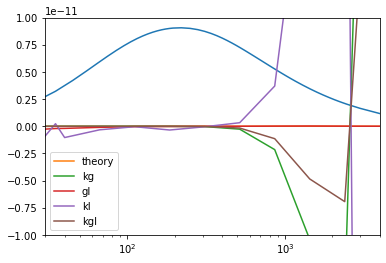

In [15]:
plt.semilogx(omega_Ls, omega_ps)
plt.semilogx(Ls_theory, N_A1_theory+N_C1_theory, label="theory")
plt.semilogx(Ls_kg, N_A1_kg+N_C1_kg, label="kg")
plt.semilogx(Ls_gI, N_A1_gI+N_C1_gI, label="gI")
plt.semilogx(Ls_gI, N_A1_kI+N_C1_kI, label="kI")
plt.semilogx(Ls_kgI, N_A1_kgI+N_C1_kgI, label="kgI")
plt.ylim(-1e-11,1e-11)
plt.xlim(3e1,4e3)
plt.legend()
plt.show()

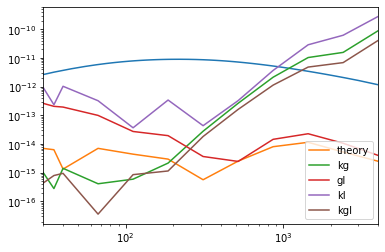

In [20]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls_theory, np.abs(N_A1_theory+N_C1_theory), label="theory")
plt.loglog(Ls_kg, np.abs(N_A1_kg+N_C1_kg), label="kg")
plt.loglog(Ls_gI, np.abs(N_A1_gI+N_C1_gI), label="gI")
plt.loglog(Ls_gI, np.abs(N_A1_kI+N_C1_kI), label="kI")
plt.loglog(Ls_kgI, np.abs(N_A1_kgI+N_C1_kgI), label="kgI")
plt.legend()
plt.xlim(3e1,4e3)
plt.show()

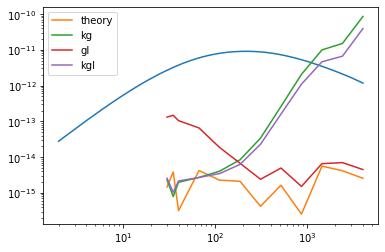

In [22]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls, np.abs(N_A1), label="theory")
plt.loglog(Ls_kg, np.abs(N_A1_kg), label="kg")
plt.loglog(Ls_gI, np.abs(N_A1_gI), label="gI")
plt.loglog(Ls_kgI, np.abs(N_A1_kgI), label="kgI")
plt.legend()
plt.show()

In [7]:
t0 = time.time()
N_A1 = bias.N_A1_vec("kg", 500,dL_prim=2,Ntheta=100,Ntheta_prim=100)
print(N_A1)
t1 = time.time()
print(f"Time = {t1 - t0}")

[-2.27946601e-13]
Time = 112.00701785087585


In [10]:
t0 = time.time()
N_A1 = bias.N_A1_vec("kg", 500,dL_prim=10,Ntheta=50,Ntheta_prim=50)
print(N_A1)
t1 = time.time()
print(f"Time = {t1 - t0}")

[-2.27058685e-13]
Time = 8.272325992584229


In [10]:
t0 = time.time()
N_A1 = bias.N_A1_vec("kg", 500,dL_prim=2,Ntheta=100,Ntheta_prim=100)
print(N_A1)
t1 = time.time()
print(f"Time = {t1 - t0}")

[-1.99329401e-15]
Time = 134.07760095596313


In [18]:
t0 = time.time()
N_A1 = bias.N_A1_vec("kg", 500,dL_prim=10,Ntheta=100,Ntheta_prim=50)
print(N_A1)
t1 = time.time()
print(f"Time = {t1 - t0}")

[-1.91735913e-15]
Time = 32.56196093559265


In [3]:
A = bias.normalisation(500)
print(A)
print(1/A)

[9.20075123e+17]
[1.08686777e-18]


In [3]:
A = bias.normalisation(500)
print(A)
print(1/A)

[1.78771942e+18]
[5.59371896e-19]


398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398, 100)
398
100
(398

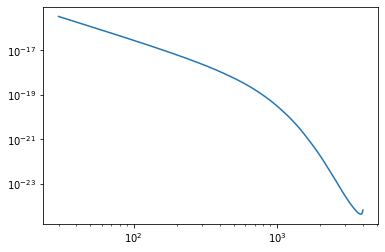

In [4]:
Ls = np.arange(30,4000,50)
A = bias.normalisation(Ls)
plt.loglog(Ls, 1/A)
plt.show()

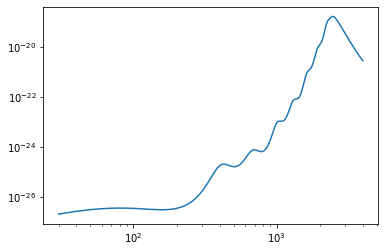

In [5]:
plt.loglog(Ls, 1/A1)

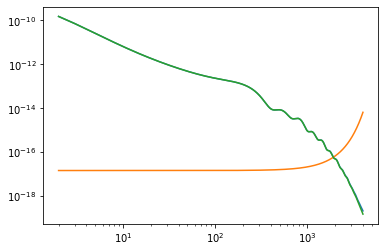

In [3]:
_noise = Noise()
_noise.setup_cmb_noise("cache/_N0/N0_my_SO_14_14_TQU.npy",0)
_cosmo = Cosmology()
cmb_T_tot = _cosmo.get_TT_lens_ps()
Ls = np.arange(np.size(cmb_T_tot))[2:4000]
N = _noise.get_cmb_gaussian_N("T")

cmb_gradT = _cosmo.get_TT_grad_lens_ps()
Ls_grad = np.arange(np.size(cmb_T_tot))[2:4000]
plt.loglog(Ls, cmb_T_tot[2:4000])
plt.loglog(Ls, N[Ls])
plt.loglog(Ls, cmb_gradT[2:4000])

(0.0, 6e-09)

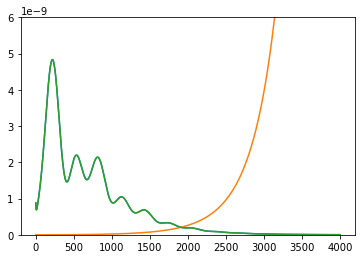

In [7]:
_noise = Noise()
_noise.setup_cmb_noise("cache/_N0/N0_my_SO_14_14_TQU.npy",0)
_cosmo = Cosmology()
cmb_T_tot = _cosmo.get_TT_lens_ps()
Ls = np.arange(np.size(cmb_T_tot))[2:4000]
N = _noise.get_cmb_gaussian_N("T")

cmb_gradT = _cosmo.get_TT_grad_lens_ps()
Ls_grad = np.arange(np.size(cmb_T_tot))[2:4000]
plt.plot(Ls, Ls*(Ls+1)*cmb_T_tot[2:4000])
plt.plot(Ls, Ls*(Ls+1)*N[Ls])
plt.plot(Ls, Ls_grad*(Ls_grad+1)*cmb_gradT[2:4000])
plt.ylim(0, 0.6e-8)

In [3]:
t0 = time.time()
profile = cProfile.run('bias.mixed_bispectrum("kg", 100, 150, 200)')
print(profile)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
         5956744 function calls (5792493 primitive calls) in 196.802 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4236    0.002    0.000    0.129    0.000 <__array_function__ internals>:2(add)
      231    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
    42564    0.012    0.000    0.170    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
     3265    0.002    0.000    0.012    0.000 <__array_function__ internals>:2(atleast_1d)
    46692    0.016    0.000    0.511    0.000 <__array_function__ internals>:2(broadcast_arrays)
       52    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
 

       78    0.000    0.000    0.000    0.000 containers.py:297(__eq__)
      292    0.000    0.000    0.008    0.000 containers.py:305(<lambda>)
1407/1357    0.001    0.000    0.005    0.000 containers.py:51(__new__)
5491/5261    0.001    0.000    0.003    0.000 containers.py:53(<genexpr>)
     2017    0.001    0.000    0.002    0.000 containers.py:57(__getitem__)
      790    0.000    0.000    0.000    0.000 containers.py:60(<genexpr>)
      801    0.000    0.000    0.000    0.000 containers.py:63(__len__)
      961    0.000    0.000    0.000    0.000 containers.py:69(__iter__)
      200    0.000    0.000    0.001    0.000 containers.py:72(__add__)
 1114/967    0.000    0.000    0.002    0.000 containers.py:97(__eq__)
        1    0.000    0.000    0.000    0.000 contextlib.py:252(contextmanager)
        1    0.000    0.000    0.000    0.000 contextlib.py:442(_create_exit_wrapper)
        1    0.000    0.000    0.000    0.000 contextlib.py:452(__init__)
        1    0.000    0.000   

    171/3    0.000    0.000    0.000    0.000 libelefun.py:123(bsp_acot)
        3    0.000    0.000    0.000    0.000 libelefun.py:137(acot_fixed)
        1    0.000    0.000    0.000    0.000 libelefun.py:146(machin)
        1    0.000    0.000    0.000    0.000 libelefun.py:162(ln2_fixed)
        3    0.000    0.000    0.000    0.000 libelefun.py:318(mpf_pow)
       11    0.000    0.000    0.000    0.000 libelefun.py:600(log_taylor)
       48    0.000    0.000    0.000    0.000 libelefun.py:634(log_taylor_cached)
       72    0.000    0.000    0.000    0.000 libelefun.py:668(mpf_log)
       55    0.000    0.000    0.000    0.000 libelefun.py:94(g)
        8    0.000    0.000    0.000    0.000 libintmath.py:131(bin_to_radix)
        8    0.000    0.000    0.000    0.000 libintmath.py:171(numeral_gmpy)
     1307    0.000    0.000    0.000    0.000 libintmath.py:303(sqrt_fixed)
       48    0.000    0.000    0.000    0.000 libintmath.py:50(lshift)
    73/69    0.000    0.000    0.000  

        1    0.000    0.000    0.271    0.271 reductions.py:124(_row_reduce)
        1    0.000    0.000    0.271    0.271 reductions.py:248(_rref)
        3    0.000    0.000    0.000    0.000 reductions.py:47(get_col)
        2    0.000    0.000    0.038    0.019 reductions.py:54(cross_cancel)
        3    0.000    0.000    0.000    0.000 relational.py:1208(_n2)
        3    0.000    0.000    0.000    0.000 relational.py:1220(_eval_is_ge)
        4    0.000    0.000    0.000    0.000 relational.py:1225(_eval_is_eq)
        3    0.000    0.000    0.001    0.000 relational.py:1261(is_gt)
        3    0.000    0.000    0.001    0.000 relational.py:1269(is_le)
        3    0.000    0.000    0.001    0.000 relational.py:1277(is_ge)
        2    0.000    0.000    0.000    0.000 relational.py:1408(is_eq)
        2    0.000    0.000    0.000    0.000 relational.py:1510(<genexpr>)
        3    0.000    0.000    0.000    0.000 relational.py:1557(<genexpr>)
        2    0.000    0.000    0.000 

       20    0.000    0.000    0.000    0.000 {method 'group' of 're.Match' objects}
       32    0.000    0.000    0.000    0.000 {method 'groups' of 're.Match' objects}
      640    0.000    0.000    0.000    0.000 {method 'index' of 'list' objects}
      250    0.000    0.000    0.000    0.000 {method 'indices' of 'slice' objects}
      145    0.000    0.000    0.000    0.000 {method 'insert' of 'list' objects}
        4    0.000    0.000    0.000    0.000 {method 'is_finite' of 'decimal.Decimal' objects}
     1260    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'item' of 'numpy.generic' objects}
    62568    0.004    0.000    0.004    0.000 {method 'items' of 'dict' objects}
      362    0.000    0.000    0.000    0.000 {method 'items' of 'mappingproxy' objects}
      567    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
     3939    0.000    0.000    0.000    0.000 {method 'keys' 

In [3]:
t0 = time.time()
profile = cProfile.run('bias.mixed_bispectrum("kg", 100, 150, 200)')
print(profile)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
         5958867 function calls (5794678 primitive calls) in 136.402 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4236    0.002    0.000    0.131    0.000 <__array_function__ internals>:2(add)
      231    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
    42564    0.012    0.000    0.171    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
     3265    0.002    0.000    0.011    0.000 <__array_function__ internals>:2(atleast_1d)
    46692    0.016    0.000    0.523    0.000 <__array_function__ internals>:2(broadcast_arrays)
       52    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
 

       78    0.000    0.000    0.000    0.000 containers.py:297(__eq__)
      292    0.000    0.000    0.008    0.000 containers.py:305(<lambda>)
1407/1357    0.001    0.000    0.005    0.000 containers.py:51(__new__)
5491/5261    0.001    0.000    0.003    0.000 containers.py:53(<genexpr>)
     2017    0.001    0.000    0.002    0.000 containers.py:57(__getitem__)
      790    0.000    0.000    0.000    0.000 containers.py:60(<genexpr>)
      801    0.000    0.000    0.000    0.000 containers.py:63(__len__)
      961    0.000    0.000    0.000    0.000 containers.py:69(__iter__)
      200    0.000    0.000    0.001    0.000 containers.py:72(__add__)
 1114/967    0.000    0.000    0.003    0.000 containers.py:97(__eq__)
        1    0.000    0.000    0.000    0.000 contextlib.py:252(contextmanager)
        1    0.000    0.000    0.000    0.000 contextlib.py:442(_create_exit_wrapper)
        1    0.000    0.000    0.000    0.000 contextlib.py:452(__init__)
        1    0.000    0.000   

    171/3    0.000    0.000    0.000    0.000 libelefun.py:123(bsp_acot)
        3    0.000    0.000    0.000    0.000 libelefun.py:137(acot_fixed)
        1    0.000    0.000    0.000    0.000 libelefun.py:146(machin)
        1    0.000    0.000    0.000    0.000 libelefun.py:162(ln2_fixed)
        3    0.000    0.000    0.000    0.000 libelefun.py:318(mpf_pow)
       11    0.000    0.000    0.000    0.000 libelefun.py:600(log_taylor)
       48    0.000    0.000    0.000    0.000 libelefun.py:634(log_taylor_cached)
       72    0.000    0.000    0.000    0.000 libelefun.py:668(mpf_log)
       45    0.000    0.000    0.000    0.000 libelefun.py:94(g)
        8    0.000    0.000    0.000    0.000 libintmath.py:131(bin_to_radix)
        8    0.000    0.000    0.000    0.000 libintmath.py:171(numeral_gmpy)
     1282    0.000    0.000    0.000    0.000 libintmath.py:303(sqrt_fixed)
       48    0.000    0.000    0.000    0.000 libintmath.py:50(lshift)
    73/69    0.000    0.000    0.000  

        1    0.000    0.000    0.272    0.272 reductions.py:124(_row_reduce)
        1    0.000    0.000    0.272    0.272 reductions.py:248(_rref)
        3    0.000    0.000    0.000    0.000 reductions.py:47(get_col)
        2    0.000    0.000    0.037    0.019 reductions.py:54(cross_cancel)
        3    0.000    0.000    0.000    0.000 relational.py:1208(_n2)
        3    0.000    0.000    0.000    0.000 relational.py:1220(_eval_is_ge)
        4    0.000    0.000    0.000    0.000 relational.py:1225(_eval_is_eq)
        3    0.000    0.000    0.001    0.000 relational.py:1261(is_gt)
        3    0.000    0.000    0.001    0.000 relational.py:1269(is_le)
        3    0.000    0.000    0.001    0.000 relational.py:1277(is_ge)
        2    0.000    0.000    0.000    0.000 relational.py:1408(is_eq)
        2    0.000    0.000    0.000    0.000 relational.py:1510(<genexpr>)
        3    0.000    0.000    0.000    0.000 relational.py:1557(<genexpr>)
        2    0.000    0.000    0.000 

       32    0.000    0.000    0.000    0.000 {method 'groups' of 're.Match' objects}
      648    0.000    0.000    0.000    0.000 {method 'index' of 'list' objects}
      250    0.000    0.000    0.000    0.000 {method 'indices' of 'slice' objects}
      146    0.000    0.000    0.000    0.000 {method 'insert' of 'list' objects}
        4    0.000    0.000    0.000    0.000 {method 'is_finite' of 'decimal.Decimal' objects}
     1260    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'item' of 'numpy.generic' objects}
    62569    0.004    0.000    0.004    0.000 {method 'items' of 'dict' objects}
      362    0.000    0.000    0.000    0.000 {method 'items' of 'mappingproxy' objects}
      567    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
     3939    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
      182    0.000    0.000    0.000    0.000 {method 'lower' of '

In [3]:
t0 = time.time()
profile = cProfile.run('bias.mixed_bispectrum("kg", 100, 150, 200)')
print(profile)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
         5957611 function calls (5793378 primitive calls) in 660.854 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4236    0.002    0.000    0.139    0.000 <__array_function__ internals>:2(add)
      231    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
       18    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
    42564    0.012    0.000    0.169    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
     3265    0.003    0.000    0.015    0.000 <__array_function__ internals>:2(atleast_1d)
    46692    0.017    0.000    0.528    0.000 <__array_function__ internals>:2(broadcast_arrays)
       52    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
 

       78    0.000    0.000    0.000    0.000 containers.py:297(__eq__)
      292    0.000    0.000    0.008    0.000 containers.py:305(<lambda>)
1407/1357    0.001    0.000    0.005    0.000 containers.py:51(__new__)
5491/5261    0.001    0.000    0.003    0.000 containers.py:53(<genexpr>)
     2017    0.001    0.000    0.002    0.000 containers.py:57(__getitem__)
      790    0.000    0.000    0.000    0.000 containers.py:60(<genexpr>)
      801    0.000    0.000    0.000    0.000 containers.py:63(__len__)
      961    0.000    0.000    0.000    0.000 containers.py:69(__iter__)
      200    0.000    0.000    0.001    0.000 containers.py:72(__add__)
 1114/967    0.000    0.000    0.003    0.000 containers.py:97(__eq__)
        1    0.000    0.000    0.000    0.000 contextlib.py:252(contextmanager)
        1    0.000    0.000    0.000    0.000 contextlib.py:442(_create_exit_wrapper)
        1    0.000    0.000    0.000    0.000 contextlib.py:452(__init__)
        1    0.000    0.000   

    167/3    0.000    0.000    0.000    0.000 libelefun.py:123(bsp_acot)
        3    0.000    0.000    0.000    0.000 libelefun.py:137(acot_fixed)
        1    0.000    0.000    0.000    0.000 libelefun.py:146(machin)
        1    0.000    0.000    0.000    0.000 libelefun.py:162(ln2_fixed)
        3    0.000    0.000    0.000    0.000 libelefun.py:318(mpf_pow)
       11    0.000    0.000    0.000    0.000 libelefun.py:600(log_taylor)
       48    0.000    0.000    0.000    0.000 libelefun.py:634(log_taylor_cached)
       72    0.000    0.000    0.000    0.000 libelefun.py:668(mpf_log)
       55    0.000    0.000    0.000    0.000 libelefun.py:94(g)
        8    0.000    0.000    0.000    0.000 libintmath.py:131(bin_to_radix)
        8    0.000    0.000    0.000    0.000 libintmath.py:171(numeral_gmpy)
     1289    0.000    0.000    0.000    0.000 libintmath.py:303(sqrt_fixed)
       48    0.000    0.000    0.000    0.000 libintmath.py:50(lshift)
    73/69    0.000    0.000    0.000  

        1    0.000    0.000    0.263    0.263 reductions.py:124(_row_reduce)
        1    0.000    0.000    0.263    0.263 reductions.py:248(_rref)
        3    0.000    0.000    0.000    0.000 reductions.py:47(get_col)
        2    0.000    0.000    0.038    0.019 reductions.py:54(cross_cancel)
        3    0.000    0.000    0.000    0.000 relational.py:1208(_n2)
        3    0.000    0.000    0.000    0.000 relational.py:1220(_eval_is_ge)
        4    0.000    0.000    0.000    0.000 relational.py:1225(_eval_is_eq)
        3    0.000    0.000    0.001    0.000 relational.py:1261(is_gt)
        3    0.000    0.000    0.001    0.000 relational.py:1269(is_le)
        3    0.000    0.000    0.001    0.000 relational.py:1277(is_ge)
        2    0.000    0.000    0.000    0.000 relational.py:1408(is_eq)
        2    0.000    0.000    0.000    0.000 relational.py:1510(<genexpr>)
        3    0.000    0.000    0.000    0.000 relational.py:1557(<genexpr>)
        2    0.000    0.000    0.000 

In [3]:
t0 = time.time()
profile = cProfile.run('bias.mixed_bispectrum("kg", 100, 150, 200)')
print(profile)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
         8773924 function calls (8566731 primitive calls) in 216.170 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4240    0.002    0.000    0.126    0.000 <__array_function__ internals>:2(add)
      244    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
       22    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
       22    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
    43780    0.012    0.000    0.184    0.000 <__array_function__ internals>:2(any)
      401    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(argsort)
     3265    0.002    0.000    0.009    0.000 <__array_function__ internals>:2(atleast_1d)
    46692    0.016    0.000    0.506    0.000 <__array_function__ internals>:2(broadcast_arrays)
       56    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
 

       14    0.000    0.000    0.000    0.000 containers.py:274(get)
       33    0.000    0.000    0.000    0.000 containers.py:293(_sorted_args)
       78    0.000    0.000    0.000    0.000 containers.py:297(__eq__)
      292    0.000    0.000    0.007    0.000 containers.py:305(<lambda>)
1407/1357    0.001    0.000    0.005    0.000 containers.py:51(__new__)
5491/5261    0.001    0.000    0.003    0.000 containers.py:53(<genexpr>)
     2017    0.001    0.000    0.002    0.000 containers.py:57(__getitem__)
      790    0.000    0.000    0.000    0.000 containers.py:60(<genexpr>)
      801    0.000    0.000    0.000    0.000 containers.py:63(__len__)
      961    0.000    0.000    0.000    0.000 containers.py:69(__iter__)
      200    0.000    0.000    0.001    0.000 containers.py:72(__add__)
 1114/967    0.000    0.000    0.002    0.000 containers.py:97(__eq__)
        1    0.000    0.000    0.000    0.000 contextlib.py:252(contextmanager)
        1    0.000    0.000    0.000    0.0

        1    0.000    0.000    0.005    0.005 lambdify.py:948(_recursive_to_string)
        1    0.000    0.000    0.011    0.011 length_weight_time.py:1(<module>)
       12    0.000    0.000    0.000    0.000 libelefun.py:1086(exp_basecase)
       12    0.000    0.000    0.000    0.000 libelefun.py:1151(mpf_exp)
    171/3    0.000    0.000    0.000    0.000 libelefun.py:123(bsp_acot)
        3    0.000    0.000    0.000    0.000 libelefun.py:137(acot_fixed)
        1    0.000    0.000    0.000    0.000 libelefun.py:146(machin)
        1    0.000    0.000    0.000    0.000 libelefun.py:162(ln2_fixed)
        3    0.000    0.000    0.000    0.000 libelefun.py:318(mpf_pow)
       11    0.000    0.000    0.000    0.000 libelefun.py:600(log_taylor)
       48    0.000    0.000    0.000    0.000 libelefun.py:634(log_taylor_cached)
       72    0.000    0.000    0.000    0.000 libelefun.py:668(mpf_log)
       55    0.000    0.000    0.000    0.000 libelefun.py:94(g)
        8    0.000    0.00

       20    0.000    0.000    0.000    0.000 rings.py:308(zero)
       24    0.000    0.000    0.000    0.000 rings.py:316(domain_new)
       16    0.000    0.000    0.000    0.000 rings.py:353(from_dict)
       24    0.000    0.000    0.000    0.000 rings.py:559(new)
        4    0.000    0.000    0.000    0.000 rings.py:570(__hash__)
       16    0.000    0.000    0.000    0.000 rings.py:618(as_expr)
       16    0.000    0.000    0.000    0.000 rings.py:626(as_expr_dict)
       16    0.000    0.000    0.000    0.000 rings.py:628(<dictcomp>)
        2    0.000    0.000    0.000    0.000 rules.py:49(__init__)
       16    0.000    0.000    0.000    0.000 rules.py:53(__contains__)
        1    0.000    0.000    0.000    0.000 sdm.py:126(extract)
       15    0.000    0.000    0.000    0.000 sdm.py:176(new)
       11    0.000    0.000    0.000    0.000 sdm.py:205(copy)
       11    0.000    0.000    0.000    0.000 sdm.py:221(<dictcomp>)
        3    0.000    0.000    0.000    0.000 sdm

None


In [3]:
t0 = time.time()
bi = bias.mixed_bispectrum("kg", 100, 150, 200)
print(bi)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, kg], [gk, gg]])
2.099043998892705e-23
Time = 223.5922110080719


In [4]:
t0 = time.time()
bi = bias.mixed_bispectrum("kg", 100, 150, 200)
print(bi)
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
2.099043998892705e-23
Time = 1.920173168182373


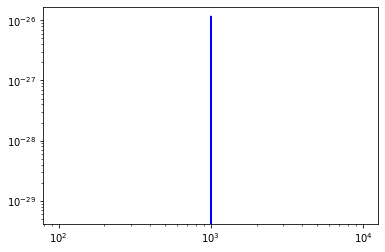

In [4]:
L1 = np.arange(2, 4001)
L2 = (L1/2).astype(np.int32)
L = np.ones(np.size(L1))*1000
bi = bias.mixed_bispectrum("kg", L, L1, L2)
plt.loglog(L, bi, color="blue") 
plt.show()

In [5]:
theory_bi = 4/(L1**2 * L2**2) * bias.bi.get_bispectrum("kkw", L, L1, L2, M_spline=True)
print(theory_bi)
plt.loglog(L, np.abs(theory_bi), color="blue") 
plt.show()

AttributeError: 'Bias' object has no attribute 'bi'

In [6]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        if typ=="mixed":
            bi_slice[L2, L3s] = bias.mixed_bispectrum("kg", L3s, L1, L2)
        else:
            bi_slice[L2, L3s] = 4/(L1**2 * L2**2)*bias.bi.get_bispectrum(typ, L1, L2, L3s, M_spline=True)
    return bi_slice

In [7]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "kkw", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "ggw":
        plt.title(f"$b^{{gg\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "gkw":
        plt.title(f"$b^{{g\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "IIw":
        plt.title(f"$b^{{II\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "Ikw":
        plt.title(f"$b^{{I\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "Igw":
        plt.title(f"$b^{{Ig\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")

In [8]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="kkw")
plt.show()

AttributeError: 'Bias' object has no attribute 'bi'

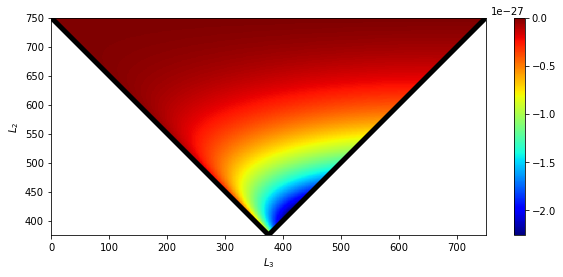

In [10]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="mixed")
# plt.clim(-1e-20, 0)
plt.show()